<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简介" data-toc-modified-id="简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简介</a></span><ul class="toc-item"><li><span><a href="#分析目的" data-toc-modified-id="分析目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>分析目的</a></span></li></ul></li><li><span><a href="#分析数据" data-toc-modified-id="分析数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>分析数据</a></span><ul class="toc-item"><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#数据类型转换" data-toc-modified-id="数据类型转换-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>数据类型转换</a></span></li><li><span><a href="#缺失值" data-toc-modified-id="缺失值-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>缺失值</a></span></li><li><span><a href="#处理异常值" data-toc-modified-id="处理异常值-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>处理异常值</a></span></li><li><span><a href="#处理重复值" data-toc-modified-id="处理重复值-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>处理重复值</a></span></li><li><span><a href="#重建索引" data-toc-modified-id="重建索引-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>重建索引</a></span></li></ul></li><li><span><a href="#数据分析" data-toc-modified-id="数据分析-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数据分析</a></span><ul class="toc-item"><li><span><a href="#哪种分类的-APP-最受开发者欢迎" data-toc-modified-id="哪种分类的-APP-最受开发者欢迎-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>哪种分类的 APP 最受开发者欢迎</a></span></li><li><span><a href="#哪种类别的-APP-安装量最高" data-toc-modified-id="哪种类别的-APP-安装量最高-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>哪种类别的 APP 安装量最高</a></span></li><li><span><a href="#哪种类别的-APP-评论量最高" data-toc-modified-id="哪种类别的-APP-评论量最高-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>哪种类别的 APP 评论量最高</a></span></li><li><span><a href="#哪种类型的-APP-口碑最好" data-toc-modified-id="哪种类型的-APP-口碑最好-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>哪种类型的 APP 口碑最好</a></span></li><li><span><a href="#各-APP-的安装/评论率分别是多少" data-toc-modified-id="各-APP-的安装/评论率分别是多少-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>各 APP 的安装/评论率分别是多少</a></span></li></ul></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>总结</a></span></li></ul></div>

## 简介

本数据来自互联网，是关于 Google Play Store 的数据。

字段包括：

- App：APP 名字

- Category：APP 类型

- Rating：评分

- Reviews：评论数

- Size：APP 大小

- Installs：安装量

- Type：是否付费

- Price：价格

- Content Rating：适用人群

- Genres：风格

- Last Updated：最后更新时间

- Current Ver：当前版本

- Android Ver：适用安卓版本

### 分析目的

- 哪些 APP 最受欢迎


- 哪些 APP 安装量最高


- 哪些类别的 APP 安装量最高


- 哪些 APP 的评论量最多


- 哪些类别的 APP 评论量最多


- 付费和免费类的 APP 在安装量、评论数方面各有什么特点


- 各 APP 的安装/评论率分别是多少

## 分析数据

根据分析目的，此次只选取App、Category、Rating、Reviews、Installs、Type 列。

In [121]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font='SimHei', rc={'axes.unicode_minus':False})

raw_data = pd.read_csv("../20191019_GooglePlayStore.csv",usecols=(0,1,2,3,5,6))

In [122]:
print(raw_data.info())
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
App         10841 non-null object
Category    10841 non-null object
Rating      9367 non-null float64
Reviews     10841 non-null object
Installs    10841 non-null object
Type        10840 non-null object
dtypes: float64(1), object(5)
memory usage: 508.3+ KB
None


,App,Category,Rating,Reviews,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free


经过初步观察，发现进行一下处理：Reviews、Installs 列需要转换成 float 类型，Rating 列存在大量缺失值，Type 列亦存在缺失值。

### 数据预处理

#### 数据类型转换

先转换 Reviews 列。

In [123]:
raw_data['Reviews'] = raw_data['Reviews'].str.replace("M","e+6")
raw_data['Reviews'] = raw_data['Reviews'].str.replace("K","e+3")

raw_data['Reviews'] = raw_data['Reviews'].astype(float)
print(raw_data.Reviews.dtype)

float64


Reviews 列转换成功，接下来转换 Installs 列。

In [169]:
raw_data.Installs = raw_data.Installs.str.replace(',', '')
raw_data.Installs = raw_data.Installs.str.replace('+', '')
raw_data.Installs = raw_data.Installs.astype(float)
raw_data.head()

,App,Category,Rating,Reviews,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free


#### 缺失值

In [139]:
print(raw_data.info())
raw_data[raw_data.isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 6 columns):
App         10839 non-null object
Category    10839 non-null object
Rating      10839 non-null float64
Reviews     10839 non-null float64
Installs    10839 non-null object
Type        10839 non-null object
dtypes: float64(2), object(4)
memory usage: 592.8+ KB
None


,App,Category,Rating,Reviews,Installs,Type
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10836,NaN,NaN,NaN,NaN,NaN,NaN
10837,NaN,NaN,NaN,NaN,NaN,NaN
10838,NaN,NaN,NaN,NaN,NaN,NaN
10839,NaN,NaN,NaN,NaN,NaN,NaN


结果：Rating 列存在 1474 个缺失值，Type 有 1 个缺失值。处理缺失值的常用方式有两种：删除和替换。可以先看看 Rating 列的数值分布情况，而后再决定使用哪种方式。

0.5956367473804342


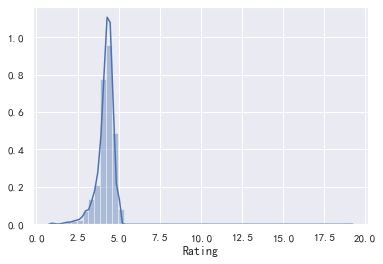

In [128]:
print(raw_data['Rating'].skew())

sns.distplot(raw_data['Rating'].dropna())

`skew()`返回的结果是 N-1 规范化的，因为其返回结果为 0.5966，大于 0，因此其数据右偏，也就是右边的数据较少。这个从图形中也可以看到。因此决定使用中值对 Rating 列的缺失值进行填充。对 Type 列的缺失值，之间删除相关数据。

In [130]:
raw_data = raw_data.fillna({'Rating':raw_data.Rating.median()})
raw_data = raw_data.dropna(how='any')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 6 columns):
App         10840 non-null object
Category    10840 non-null object
Rating      10840 non-null float64
Reviews     10840 non-null float64
Installs    10840 non-null object
Type        10840 non-null object
dtypes: float64(2), object(4)
memory usage: 592.8+ KB


#### 处理异常值

In [131]:
raw_data.describe()

,Rating,Reviews
count,10840.000000,1.084000e+04
mean,4.207832,4.444296e+05
std,0.500916,2.927860e+06
min,1.000000,0.000000e+00
25%,4.100000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.480025e+04
max,19.000000,7.815831e+07


Rating 列出现的最大值是 19。由于规定，Google Play Store 评分范围在 1~5 之内，现在已经出现 19 的数据。再看看其他的数据有没有超出范围的数据，并且显示超出评分范围的数据。

In [132]:
raw_data[raw_data['Rating'] > 5]

,App,Category,Rating,Reviews,Installs,Type
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,Free,0


经过初步观察，应该是该行数据的 Category 列数据缺失，其他列数据往前补位，导致出现数据异常。由于缺乏 Category，决定删除该行数据。

In [133]:
raw_data = raw_data.drop([raw_data[raw_data['Rating'] > 5].index[0]])

In [134]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 6 columns):
App         10839 non-null object
Category    10839 non-null object
Rating      10839 non-null float64
Reviews     10839 non-null float64
Installs    10839 non-null object
Type        10839 non-null object
dtypes: float64(2), object(4)
memory usage: 592.8+ KB


#### 处理重复值

In [141]:
raw_data.duplicated('App')

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10839, dtype: bool

In [144]:
raw_data.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

首先查看 APP 名字相同的数据有多少，而后删除这些数据。

In [145]:
raw_data.App.value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
Legion of Heroes                                     1
FG Radio - Radios de France                          1
Mobile Legends: Bang Bang                            1
DS - xR                                              1
CI Attendance                                        1
Name: App, Length: 9658, dtype: int64

删除重复数据。

In [150]:
raw_data.drop_duplicates('App', inplace=True)
raw_data.App.value_counts()

OnTrack Diabetes                               1
BN Pro BlueICS HD Text                         1
PlayStation App                                1
CW Nuclear                                     1
Paris ci la Sortie du Métro                    1
                                              ..
DrivingTest                                    1
Driving n Parking School 2017                  1
Sports Alerts - NFL edition                    1
Builder Craft: House Building & Exploration    1
CI Attendance                                  1
Name: App, Length: 9658, dtype: int64

已经成功删除重复值。

#### 重建索引

首先查看处理后的数据集索引。

In [152]:
raw_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839,
            10840],
           dtype='int64', length=9658)

序列最末值是 10840，但是长度只有 9658。索引明显存在跳数情形，因此需要重置索引。

In [157]:
raw_data.reindex(index=range(9658))

,App,Category,Rating,Reviews,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000,Free
...,...,...,...,...,...,...
9653,EO Events,BUSINESS,4.3,0.0,10,Free
9654,EO KOREA,BUSINESS,4.3,0.0,50,Free
9655,EO App. SelfCompassion to you,HEALTH_AND_FITNESS,4.3,1.0,100,Free
9656,EO GSEA,BUSINESS,4.3,1.0,10,Free


### 数据分析

#### 哪种分类的 APP 最受开发者欢迎

“最受欢迎”，此处定义为分类下 APP 数量最多。

In [161]:
raw_data.groupby("Category").count().sort_values(by="App",ascending=False).head(1)

,App,Rating,Reviews,Installs,Type
Category,,,,,
FAMILY,1831,1831,1831,1831,1831


#### 哪种类别的 APP 安装量最高

In [176]:
raw_data.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(1)

Category
GAME    1.387892e+10
Name: Installs, dtype: float64

#### 哪种类别的 APP 评论量最高

In [163]:
raw_data.groupby("Category").count().sort_values(by="Reviews",ascending=False).head(1)

,App,Rating,Reviews,Installs,Type
Category,,,,,
FAMILY,1831,1831,1831,1831,1831


#### 哪种类型的 APP 口碑最好

此处的“口碑最好”采用平均评分最高的数据。

In [182]:
raw_data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(1)

Category
EVENTS    4.395313
Name: Rating, dtype: float64

实则这样粗略定义是不对的。因为有些类型的评价数量少，但是可能评价会极高，类似豆瓣电影评分。有些电影评分人数很少，但是评分都很高，都是一些铁粉在评论，而这部分电影，虽然评分高，但是进不了豆瓣电影 TOP250。此处也应该注意各类 APP 的评论人数和评分之间的关系。因为从上面的分析看，“GAME”类的下载量最多，可能其评价数量也最多，数据越大，范围越广，其数据更有可能呈现高斯分布。按照豆瓣电影评分的规律，可以分为 P、b、D、L 四大类型。

#### 各 APP 的安装/评论率分别是多少

将 APP 按照“收费”与“免费”进行分类，而后统计各种 APP 类型下的安装/评论率。

In [184]:
rate = raw_data.groupby(['Type', 'Category']).mean()

(rate['Reviews'] / rate['Installs']).sort_values(ascending=False)

Type  Category           
Paid  VIDEO_PLAYERS          0.188268
      FAMILY                 0.175913
      WEATHER                0.168031
      PARENTING              0.166986
      DATING                 0.141674
                               ...   
Free  BOOKS_AND_REFERENCE    0.010036
      NEWS_AND_MAGAZINES     0.009763
      PRODUCTIVITY           0.009569
      TRAVEL_AND_LOCAL       0.009259
Paid  EVENTS                 0.000000
Length: 63, dtype: float64

粗略来看，似乎收费 APP 的安装/评论率明显高于免费 APP。

先假设这个分析结果正确，那么其可能的原因是：用户进行评论是对自己花的钱负责，不管“负责”的内容是“辱骂”、“建议”或是“吐槽”；还有就是，免费 APP 数值这么低的原因可能有：“免费”与传播范围、传播速度有关。用户可能并不太愿意安装需要付费的 APP。另，免费 APP 评论量之所以这么少，可能是用户觉得自己没有损失（金钱），所以如果有情绪，第一反应是卸载游戏，而不是再额外花费时间评论该 APP（人的直觉真厉害，可以让人直接舍弃“沉没成本”）。

另，还有注意评论是否存在水军。此处缺乏相关数据（如相关用户注册时间、评论内容（包括某些用户的历史评论记录）等等），无法判断是否存在水军。

## 总结

做这个案例，其大部分时间都花在数据预处理上，其包括数据类型转换、处理缺失值、处理异常值、处理重复值，甚至有时候还要处理索引的问题，因为在经过数据预处理后，其数据集的自然序列被破坏，必须重建索引。

有时候处理完数据，以为可以数据分析，可是一分析，直接报错，原因是有部分数据没有被处理（数据太多，不可能了解每个数据），而这时又不得不找到未处理的数据，以进行再处理。

甚至各种处理缺乏业务背景而没有办法继续分析下去。这就是从网上找的数据集但是缺乏业务认识的不足，或者说，先天残疾。

该份数据分析案例，更多的是偏向业务方向，而非技术方向。比如说如何定义“最受欢迎”等等。